In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
K=3
weight=[0.9,0.05,0.05]
mean=[-10,0,10]
covs=[1,1,1]
Theta=np.array([weight,mean,covs])

In [3]:
num=6000
a=int(weight[0]*num)
b=int((weight[0]+weight[1])*num)

In [4]:
np.random.seed(123)
bb=np.zeros(num)

In [5]:
for i in range(a):
    bb[i]=np.random.randn()+mean[0]
for i in range(a,b):
    bb[i]=np.random.randn()+mean[1]
for i in range(b,num):
    bb[i]=np.random.randn()+mean[2]

(array([ 2.,  5., 21., 45., 54., 62., 48., 31., 23.,  9.]),
 array([ 7.12432558,  7.63705725,  8.14978892,  8.66252059,  9.17525226,
         9.68798393, 10.20071559, 10.71344726, 11.22617893, 11.7389106 ,
        12.25164227]),
 <BarContainer object of 10 artists>)

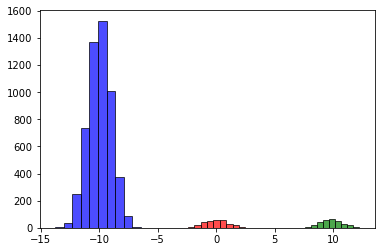

In [6]:
plt.hist(bb[0:a], bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.hist(bb[a:b], bins=10,  facecolor="red", edgecolor="black", alpha=0.7)
plt.hist(bb[b:num], bins=10, facecolor="green", edgecolor="black", alpha=0.7)

In [8]:
def normal(x,theta):
    mu=theta[0]
    s=theta[1]
    a=(1/np.sqrt(2*np.pi*s))*np.exp((-1/2*s)*pow(x-mu,2))
    return a

def EM(X,theta):
    Ga=np.zeros((num,K))
    c=np.zeros(K)
    d=np.zeros(K)
    thetanext=np.zeros((3,K))
    for j in range(num):
        for k in range(K):
            c[k]=theta[0][k]*normal(X[j],theta[1:,k])
        Ga[j]=c/np.sum(c)

    for k in range(K):
        d[k]=np.sum(Ga[:,k])
        thetanext[0,k]=d[k]/num
        thetanext[1,k]=np.dot(Ga[:,k],X[:])/d[k]
        thetanext[2,k]=np.dot(Ga[:,k],pow(X[:]-theta[1,k],2))/d[k]

    return thetanext

In [9]:
weight0=[0.7,0.2,0.1]
mean0=[-5,0,5]
covs0=[1,1,1]
theta0=np.array([weight0,mean0,covs0])

In [10]:
def iterate(X,n,T0):
    for i in range (n):
        T0=EM(bb,T0)
    return T0

In [11]:
iterate(bb,10,theta0)

array([[ 0.9       ,  0.05      ,  0.05      ],
       [-9.9813332 ,  0.04301192,  9.91081993],
       [ 0.97103828,  1.03976013,  0.91804689]])